In [4]:
!pip install fastparquet
!pip install pyarrow



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/25.1 MB ? eta -:--:--
   -- ------------------------------------- 1.8/25.1 MB 11.2 MB/s eta 0:00:03
   ------ --------------------------------- 3.9/25.1 MB 11.2 MB/s eta 0:00:02
   --------- ------------------------------ 6.0/25.1 MB 10.6 MB/s eta 0:00:02
   ------------- -------------------------- 8.7/25.1 MB 11.0 MB/s eta 0:00:02
   ----------------- ---------------------- 11.3/25.1 MB 11.1 MB/s eta 0:00:02
   --------------------- ------------------ 13.4/25.1 MB 11.0 MB/s eta 0:00:02
   ------------------------- -------------- 16.0/25.1 MB 11.1 MB/s eta 0:00:01
   ----------------------------- ---------- 18.4/25.1 MB 11.2 MB/s eta 0:00:01
   --------------------------------- ------ 21.0/25.1 MB 11.2 MB/s eta 0:00:01
   ------------------------------------- -- 23.3/25.1 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------  24.9/25.1 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 25.1/25.1 MB 10.7 MB/


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Load parquet dataset

In [5]:
import pandas as pd

# Load the Parquet dataset
df = pd.read_parquet('C:/Users/Malek/Downloads/music_dataset')

# Display the first few rows of the dataframe
print(df.head())

                                               audio  song_id  genre_id  \
0  {'bytes': b'OggS\x00\x02\x00\x00\x00\x00\x00\x...        3        -1   
1  {'bytes': b'OggS\x00\x02\x00\x00\x00\x00\x00\x...        6        -1   
2  {'bytes': b'OggS\x00\x02\x00\x00\x00\x00\x00\x...        8        -1   
3  {'bytes': b'OggS\x00\x02\x00\x00\x00\x00\x00\x...       11        -1   
4  {'bytes': b'OggS\x00\x02\x00\x00\x00\x00\x00\x...       17        -1   

     genre  
0  Unknown  
1  Unknown  
2  Unknown  
3  Unknown  
4  Unknown  


Describe the data

In [6]:
print(df.info())

# Get descriptive statistics
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24985 entries, 0 to 24984
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   audio     24985 non-null  object
 1   song_id   24985 non-null  int64 
 2   genre_id  24985 non-null  int64 
 3   genre     24985 non-null  object
dtypes: int64(2), object(2)
memory usage: 780.9+ KB
None
            song_id      genre_id
count  24985.000000  24985.000000
mean   12497.595357      3.176386
std     7216.373368      4.026925
min        0.000000     -1.000000
25%     6249.000000      0.000000
50%    12497.000000      2.000000
75%    18747.000000      6.000000
max    24999.000000     18.000000


Afficher un exemple audio


In [29]:

from IPython.display import Audio



x=df.iloc[0,0]
y=df.iloc[1,3]
print(x['bytes'])
print(y)



# Assuming `audio` is the variable holding your audio bytes

audio=x['bytes']

# Display the audio
Audio(audio, rate=44100)  # Replace 44100 with the correct sampling rate for your audio data



b'OggS\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00(\x96*\x13\x00\x00\x00\x00\x07\xce~r\x01\x1e\x01vorbis\x00\x00\x00\x00\x02D\xac\x00\x00\x00\x00\x00\x00\x80\xb5\x01\x00\x00\x00\x00\x00\xb8\x01OggS\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00(\x96*\x13\x01\x00\x00\x00\xa1\xaaN\x06\x11@\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x07\x03vorbis\r\x00\x00\x00Lavf58.29.100\x01\x00\x00\x00\x1f\x00\x00\x00encoder=Lavc58.54.100 libvorbis\x01\x05vorbis%BCV\x01\x00@\x00\x00$s\x18*F\xa5s\x16\x84\x10\x1aBP\x19\xe3\x1cB\xcek\xec\x19BL\x11\x82\x1c2L[\xcb%s\x90!\xa4\xa0B\x88[(\x81\xd0\x90U\x00\x00@\x00\x00\x87Ax\x14\x84\x8aA\x08!\x84%=X\x92\x83\'=\x08!\x84\x889x\x14\x84iA\x08!\x84\x10B\x08!\x84\x10B\x08!\x84E9h\x92\x83\'A\x08\x1d\x84\xe308\x0c\x83\xe58\xf8\x1c\x84E9X\x10\x83\'A\xe8 \x84\x0fB\xb8\x9a\x83\xac9\x08!\x84$5HP\x83\x069\xe8\x1c\x84\xc2,(\x8a\x82\xc40\xb8\x16\x84\x045(\x8c\x82\xe40\xc8\xd4\x83\x0bB\x88\x9a\x83I5\xf8\x1a\x84gAx\x16\x84iA\x08!\x84$AH\x90\x83\x06A\xc8\x18\x84FAX\x92\x83

Create .wav files from audio bytes

In [32]:
import pandas as pd
import io
import wave

# Let's assume the column 'audio' contains the binary data for the .wav files
# Adjust column name as necessary
audio_column = 'audio'

# Extract the binary data for each .wav file
audio1_data = df.iloc[0, 0]['bytes']


# Create a filename for the .wav file
filename = "audio_1.wav"

# Write the binary data to a .wav file
with wave.open(filename, 'wb') as wf:
    # Assuming the audio data is in a format supported by wave module
    # You may need to adjust parameters (e.g., channels, sample width, frame rate)
    wf.setnchannels(1)  # Mono audio (adjust if stereo or other)
    wf.setsampwidth(2)  # 2 bytes per sample (16-bit)
    wf.setframerate(44100)  # 44.1 kHz sampling rate
    wf.writeframes(audio1_data)

print(f"Saved {filename}")


Saved audio_1.wav


Transformation en MEL-Spectrogramme

In [ ]:
!pip install librosa matplotlib numpy


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np


x=df.iloc[0,0]

print(x['path'])


# Load the audio file (replace 'path_to_audio.wav' with your file path)
audio_path=x['path']

y, sr = librosa.load(audio_path, sr=None)  # y is the audio time series, sr is the sampling rate

# Create a Mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

# Convert to dB for better visualization
S_dB = librosa.power_to_db(S, ref=np.max)

# Plot the Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()


AVEC SCIPY

In [20]:
!pip install scipy matplotlib numpy



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


None


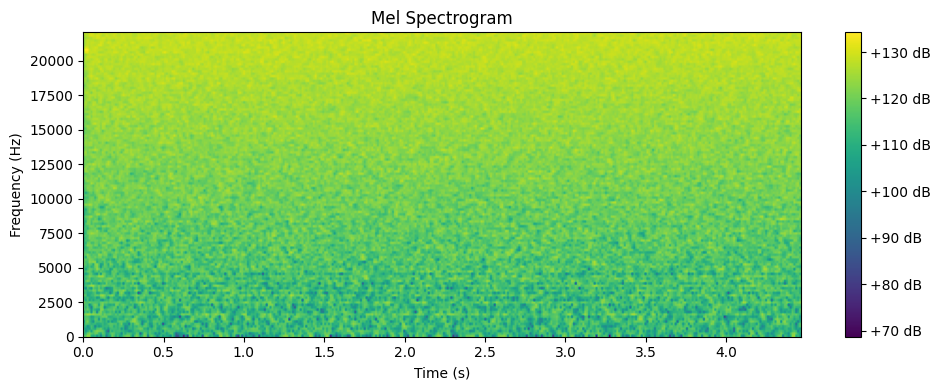

In [33]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

# Function to create Mel filter banks
def mel_filter_bank(num_filters, fft_size, sample_rate, fmin=0, fmax=None):
    if fmax is None:
        fmax = sample_rate / 2  # Nyquist frequency

    # Convert frequencies to Mel scale
    def hz_to_mel(hz):
        return 2595 * np.log10(1 + hz / 700.0)

    def mel_to_hz(mel):
        return 700 * (10**(mel / 2595.0) - 1)

    mel_min = hz_to_mel(fmin)
    mel_max = hz_to_mel(fmax)

    # Create linearly spaced Mel points and convert to Hz
    mel_points = np.linspace(mel_min, mel_max, num_filters + 2)
    hz_points = mel_to_hz(mel_points)

    # Map Hz points to FFT bins
    bin_points = np.floor((fft_size + 1) * hz_points / sample_rate).astype(int)

    # Create filter bank
    filter_bank = np.zeros((num_filters, int(fft_size / 2) + 1))
    for i in range(1, num_filters + 1):
        filter_bank[i - 1, bin_points[i - 1]: bin_points[i]] = np.linspace(0, 1, bin_points[i] - bin_points[i - 1])
        filter_bank[i - 1, bin_points[i]: bin_points[i + 1]] = np.linspace(1, 0, bin_points[i + 1] - bin_points[i])

    return filter_bank

#Test on the first audio

x=df.iloc[0,0]
print(x['path'])

audio_path=x['path']

# Load the audio file
#sample_rate, audio = wav.read(audio_path)  # Replace with your file
sample_rate, audio = wav.read("/audio_1.wav")  # Replace with your file

if audio.ndim > 1:
    audio = audio.mean(axis=1)  # Convert to mono

# Parameters
fft_size = 2048
hop_size = 512
num_mel_filters = 128

# Calculate STFT
def stft(signal, fft_size, hop_size):
    window = np.hanning(fft_size)
    num_frames = 1 + (len(signal) - fft_size) // hop_size
    frames = np.stack([signal[i * hop_size:i * hop_size + fft_size] for i in range(num_frames)])
    windowed_frames = frames * window
    stft_matrix = np.fft.rfft(windowed_frames, n=fft_size)
    return np.abs(stft_matrix) ** 2

spectrogram = stft(audio, fft_size, hop_size)

# Create Mel filter bank and apply
mel_filters = mel_filter_bank(num_mel_filters, fft_size, sample_rate)
mel_spectrogram = np.dot(mel_filters, spectrogram.T)

# Convert to dB
mel_spectrogram_db = 10 * np.log10(np.maximum(mel_spectrogram, 1e-10))

# Plot the Mel spectrogram
plt.figure(figsize=(10, 4))
plt.imshow(mel_spectrogram_db, aspect='auto', origin='lower',
           extent=[0, len(audio) / sample_rate, 0, sample_rate / 2])
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()
